# Bernstein–Vazirani algorithm

This notebook runs the Bernstein–Vazirani algorithm on a local simulator and a QPU on Amazon Braket. 

# References 
[1] Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, doi:10.1137/S0097539796300921.


# Run on a local simulator

In [16]:
from bernstein_vazirani import bernstein_vazirani_circuit, marginalize_measurements, plot_bitstrings
from braket.devices import LocalSimulator
from braket.tracking import Tracker

tracker = Tracker()

local_simulator = LocalSimulator()

bv_circuit = bernstein_vazirani_circuit("100")

In [17]:
print(bv_circuit)

T  : |0|1| 2 |3|
                
q0 : -H---C---H-
          |     
q1 : -H-I-|-H---
          |     
q2 : -H-I-|-H---
          |     
q3 : -H-Z-X-----

T  : |0|1| 2 |3|


In [18]:
task = local_simulator.run(bv_circuit, shots=1000)
result = task.result()

In [19]:
counts = marginalize_measurements(result.measurement_counts)
print(counts)

Counter({'100': 1000})


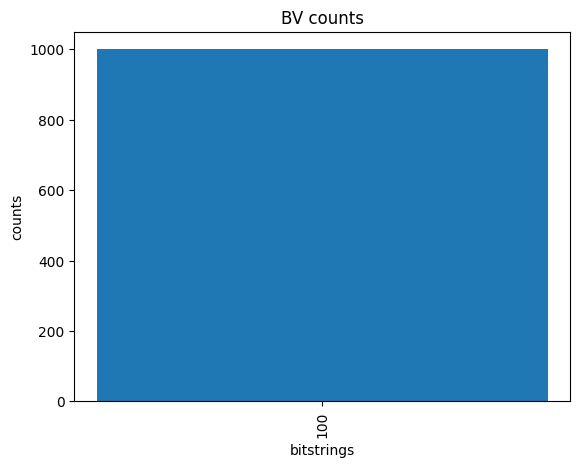

In [20]:
plot_bitstrings(counts, title="BV counts")

# Run on a noisy simulator

Let's try a noisy simulator

In [21]:
from bernstein_vazirani import bernstein_vazirani_circuit, marginalize_measurements, plot_bitstrings
from braket.circuits.noises import BitFlip
from braket.devices import LocalSimulator

local_simulator = LocalSimulator("braket_dm")

noisy_bv_circuit = bernstein_vazirani_circuit("100").apply_readout_noise(BitFlip(0.05))
print(noisy_bv_circuit)

T  : |0|1| 2 |        3        |
                                
q0 : -H---C---H--------BF(0.05)-
          |                     
q1 : -H-I-|-H-BF(0.05)----------
          |                     
q2 : -H-I-|-H-BF(0.05)----------
          |                     
q3 : -H-Z-X---BF(0.05)----------

T  : |0|1| 2 |        3        |


In [22]:
task = local_simulator.run(noisy_bv_circuit, shots=1_000)
result = task.result()

counts = marginalize_measurements(result.measurement_counts)
print(counts)

Counter({'100': 866, '101': 48, '110': 38, '000': 36, '111': 5, '010': 5, '001': 2})


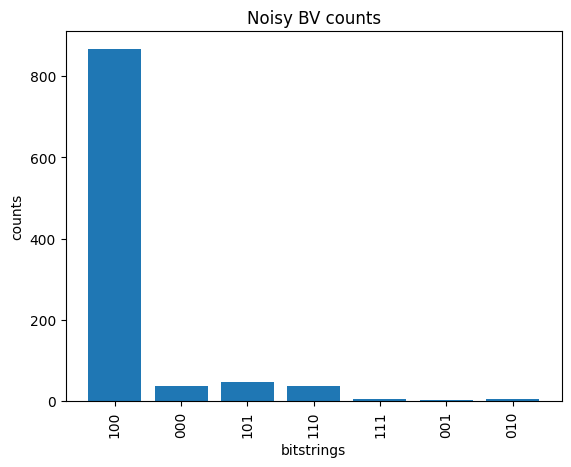

In [23]:
plot_bitstrings(counts, title="Noisy BV counts")

[Print the final costs]

In [24]:
print(
    f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost():.2f} USD"
)

Estimated cost to run this example: 0.00 USD


Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).